# Range-Height Indicator (RHI) plots

A notebook showing how to make RHI plots using wradlib.

In [3]:
%pylab inline
import numpy as np
import pylab as pl
import os
import wradlib as wrl

import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [27]:
datadir = '../phirad-data/radars/subic'
files = os.listdir(datadir)
files = [f for f in files if '20160812' in f]
files = [f for f in files if not ('01-ZH' in f)]
files = [f for f in files if not ('03-ZH' in f)]

In [40]:
datavol = np.empty((360,240,len(files)))
th = []

for i,f in enumerate(files):
    fname = os.path.join(datadir, f)
    
    data, attrs = wrl.io.read_EDGE_netcdf(fname)
    th.append(attrs['Elevation'])
    
    datavol[...,...,i] = data

In [35]:
r = attrs['r']
az = attrs['az']

In [43]:
data_r = np.ma.masked_invalid(datavol[90])

(0, 12000)

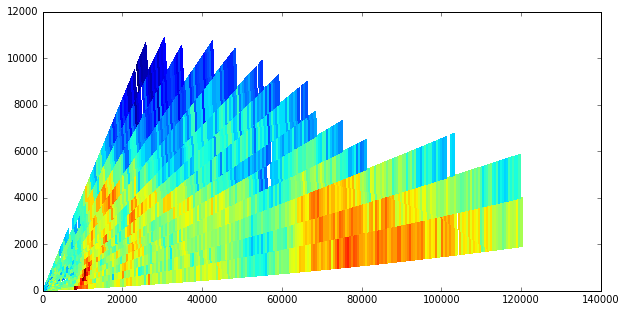

In [47]:
pl.figure(figsize=(10,5))
wrl.vis.plot_rhi(data_r.T, th=th, r=r)
pl.ylim(0,12000)